In [1]:
%pylab inline
import desispec
import desitarget
import desimodel.io
print('desimodel ', desimodel.__version__)
print('desispec  ', desispec.__version__)
print('desitarget', desitarget.__version__)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.table import Table, vstack, hstack
import fitsio
import glob
import os
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib
desimodel  0.12.0.dev597
desispec   0.33.0.dev3890
desitarget 0.37.0.dev3908


# Data for observation conditions of miniSV2 and SVo tiles commisioning.

In [2]:
path_cond_comisioning="/global/cfs/cdirs/desi/users/ameisner/GFA/conditions/"

In [3]:
os.listdir(path_cond_comisioning)

['offline_all_guide_ccds_SV0.fits',
 'offline_all_guide_ccds_thru_20200315.fits',
 'offline_all_guide_ccds_minisv2.fits']

In [4]:
print("Night conditions for minisv2: "+os.listdir(path_cond_comisioning)[2])
print("Night conditions for SV0: "+os.listdir(path_cond_comisioning)[0])
print("Night conditions for all commissioning: "+os.listdir(path_cond_comisioning)[1])

Night conditions for minisv2: offline_all_guide_ccds_minisv2.fits
Night conditions for SV0: offline_all_guide_ccds_SV0.fits
Night conditions for all commissioning: offline_all_guide_ccds_thru_20200315.fits


In [5]:
#!fitsheader /global/cfs/cdirs/desi/users/ameisner/GFA/conditions/offline_all_guide_ccds_minisv2.fits

In [6]:
cond_SV0=Table(fitsio.read("/global/cfs/cdirs/desi/users/ameisner/GFA/conditions/offline_all_guide_ccds_SV0.fits", ext=1))
cond_SV2=Table(fitsio.read("/global/cfs/cdirs/desi/users/ameisner/GFA/conditions/offline_all_guide_ccds_minisv2.fits", ext=1))

cond_SV2.columns

<TableColumns names=('MEDIAN','MEAN','N_NON_FINITE','MAX','MIN','SIG_ROBUST','SIG','MEDIAN_Q1','MEAN_Q1','N_NON_FINITE_Q1','MAX_Q1','MIN_Q1','SIG_ROBUST_Q1','SIG_Q1','MEDIAN_Q2','MEAN_Q2','N_NON_FINITE_Q2','MAX_Q2','MIN_Q2','SIG_ROBUST_Q2','SIG_Q2','MEDIAN_Q3','MEAN_Q3','N_NON_FINITE_Q3','MAX_Q3','MIN_Q3','SIG_ROBUST_Q3','SIG_Q3','MEDIAN_Q4','MEAN_Q4','N_NON_FINITE_Q4','MAX_Q4','MIN_Q4','SIG_ROBUST_Q4','SIG_Q4','CAMERA','SKY_MAG_AB','SKY_MAG_AB_PER_AMP','PETAL_LOC','EXPID','MJD','PROGRAM','SKYRA','SKYDEC','DOMSHUTL','DOMSHUTU','PMCOVER','MOONRA','MOONDEC','T_C_FOR_DARK','T_C_FOR_DARK_IS_GUESS','TIME_S_FOR_DARK','AIRMASS','NIGHT','FOCUS','EXPTIME','CUBE_INDEX','RACEN','DECCEN','FNAME_RAW','GITREV','EXTNAME','CONTRAST','FIBER_FRACFLUX','N_SOURCES_FOR_PSF','APER_CORR_FAC','XCENTROID_PSF','YCENTROID_PSF','MOON_SEP_DEG','ZP_ADU_PER_S','TRANSPARENCY','NPIX_BAD_TOTAL','NPIX_BAD_PER_AMP','OVERSCAN_MEDIANS_ADU','PRESCAN_MEDIANS_ADU','FWHM_MAJOR_PIX','FWHM_MINOR_PIX','FWHM_PIX','FWHM_ASEC','N_SO

In [7]:
pd.DataFrame(np.unique(cond_SV2["NIGHT"],return_counts=True))

,0,1,2,3,4,5,6,7,8,9
0,20200219,20200220,20200224,20200225,20200226,20200227,20200228,20200229,20200303,20200304
1,12138,3378,5520,6342,8250,6912,8646,1104,11250,13062


# Data for coadds miniSV2 and SV0 tiles commisioning (BGS objects).

In [8]:
### BGS objects.
path_coadds="/global/cfs/cdirs/desi/users/chahah/bgs_exp_coadd/"

In [9]:
unique_days=np.unique(cond_SV2["NIGHT"])
unique_spectro_id=np.unique(cond_SV2["SPECTRO_EXPID"])

In [10]:
for filename in os.listdir(path_coadds):
    for j in unique_days:
        if filename.endswith(".fits") and "20200225" in filename and 'coadd' in filename and '00052112' in filename and '-7-' in filename:
            print(filename)
        else:
            continue

coadd-70502-20200225-7-00052112.fits
coadd-70502-20200225-7-00052112.fits
coadd-70502-20200225-7-00052112.fits
coadd-70502-20200225-7-00052112.fits
coadd-70502-20200225-7-00052112.fits
coadd-70502-20200225-7-00052112.fits
coadd-70502-20200225-7-00052112.fits
coadd-70502-20200225-7-00052112.fits
coadd-70502-20200225-7-00052112.fits
coadd-70502-20200225-7-00052112.fits


In [11]:
data_vis=Table(fitsio.read("/global/cfs/cdirs/desi/users/chahah/bgs_exp_coadd/coadd-66014-20200314-1-00055432.fits", ext=1))
np.unique(data_vis["OBJTYPE"])

SKY
TGT


In [12]:
cond_SV2[(cond_SV2["NIGHT"]==20200225)&(cond_SV2["SPECTRO_EXPID"]==52112)&(cond_SV2["PETAL_LOC"]==7)]

MEDIAN,MEAN,N_NON_FINITE,MAX,MIN,SIG_ROBUST,SIG,MEDIAN_Q1,MEAN_Q1,N_NON_FINITE_Q1,MAX_Q1,MIN_Q1,SIG_ROBUST_Q1,SIG_Q1,MEDIAN_Q2,MEAN_Q2,N_NON_FINITE_Q2,MAX_Q2,MIN_Q2,SIG_ROBUST_Q2,SIG_Q2,MEDIAN_Q3,MEAN_Q3,N_NON_FINITE_Q3,MAX_Q3,MIN_Q3,SIG_ROBUST_Q3,SIG_Q3,MEDIAN_Q4,MEAN_Q4,N_NON_FINITE_Q4,MAX_Q4,MIN_Q4,SIG_ROBUST_Q4,SIG_Q4,CAMERA,SKY_MAG_AB,SKY_MAG_AB_PER_AMP [4],PETAL_LOC,EXPID,MJD,PROGRAM,SKYRA,SKYDEC,DOMSHUTL,DOMSHUTU,PMCOVER,MOONRA,MOONDEC,T_C_FOR_DARK,T_C_FOR_DARK_IS_GUESS,TIME_S_FOR_DARK,AIRMASS,NIGHT,FOCUS,EXPTIME,CUBE_INDEX,RACEN,DECCEN,FNAME_RAW,GITREV,EXTNAME,CONTRAST,FIBER_FRACFLUX,N_SOURCES_FOR_PSF,APER_CORR_FAC,XCENTROID_PSF,YCENTROID_PSF,MOON_SEP_DEG,ZP_ADU_PER_S,TRANSPARENCY,NPIX_BAD_TOTAL,NPIX_BAD_PER_AMP [4],OVERSCAN_MEDIANS_ADU [4],PRESCAN_MEDIANS_ADU [4],FWHM_MAJOR_PIX,FWHM_MINOR_PIX,FWHM_PIX,FWHM_ASEC,N_SOURCES,NAXIS [2],"CD [2,2]",CDELT [2],CRPIX [2],CRVAL [2],CTYPE [2],LONGPOLE,LATPOLE,PV2 [2],FNAME_MASTER_DARK,DO_FIT_DARK_SCALING,MASTER_DARK_EXPTIME,MASTER_DARK_GCCDTEMP,DARK_TEMP_SCALING_FACTOR,TOTAL_DARK_SCALING_FACTOR,DARK_RESCALE_FACTORS_PER_AMP [4],DARK_RESCALE_FACTOR_BESTFIT,DARK_RESCALE_FACTOR_ADOPTED,APPLY_DARK_RESCALE_FACTOR,DARK_RESCALE_NCALLS [4],DARK_RESCALE_CONVERGED [4],SPECTRO_EXPID
float64,float64,int64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,bytes6,float64,float32,uint8,int64,float64,bytes94,float64,float64,bytes8,bytes8,bytes4,float64,float64,float64,int64,float64,float64,int64,bytes37,float64,int64,float64,float64,bytes97,bytes7,bytes6,float64,float64,int64,float64,float64,float64,float64,float64,float64,int64,int64,float32,float32,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64,bytes8,float64,float64,float64,bytes114,uint8,float64,float64,float64,float64,float64,float64,float64,uint8,int64,uint8,int32
1479.0,1487.4595261211543,0,6988.0,1373.0,48.92587321068487,48.92587321068487,1487.0,1488.526859253876,0,6988.0,1431.0,8.895613311033612,8.895613311033612,1424.0,1427.571287169937,0,6682.0,1373.0,10.378215529539215,10.378215529539215,1462.0,1465.9157109223595,0,6474.0,1408.0,11.860817748044816,11.860817748044816,1566.0,1567.8242471384447,0,6389.0,1497.0,10.378215529539215,10.378215529539215,GUIDE7,21.533824106902667,21.57187 .. 21.574625,7,52112,58905.29384757,SV tile 70502,180.006929,-0.50838,not open,open,open,7.309801,-2.342021,9.736,0,5.0,1.376164,20200225,"750.9,-291.2,1262.0,-14.9,-1.4,0.0",5.0,1,181.6661972981287,-0.4568011536907368,/project/projectdirs/desi/spectro/data/20200225/00052112/guide-00052112.fits.fz,1f12aa8,GUIDE7,0.9999364006443532,0.07917428316494163,2,0.2761376195024084,23.806247963898077,23.758578171850118,173.7016904332303,27.842524607350057,8.671676058055297,0,0 .. 0,1407.0 .. 1373.0,1396.0 .. 1364.0,nan,nan,nan,nan,4,2048 .. 1032,3.87411969604e-07 .. 6.56255014282e-08,1.0 .. 1.0,1924.9534909600002 .. 30991.8425622,180.006929 .. -0.50838,RA---TAN .. DEC--TAN,180.0,90.0,0.0 .. 0.0,/project/projectdirs/desi/users/ameisner/GFA/gfa_reduce_etc/master_dark_library/master_dark-00034296_00034345.fits,1,5.0,10.281,0.8513757254194636,4.801520837111563,1.144135131835938 .. 1.0572119140625,1.1279440307617192,1.1279440307617192,1,49 .. 35,1 .. 1,52112
1479.0,1487.4725587830062,0,6884.0,1378.0,48.92587321068487,48.92587321068487,1487.0,1488.5498368610708,0,6884.0,1428.0,8.895613311033612,8.895613311033612,1424.0,1427.5701573098352,0,6745.0,1378.0,10.378215529539215,10.378215529539215,1462.0,1465.9333628573158,0,6437.0,1409.0,11.860817748044816,11.860817748044816,1566.0,1567.8368781038032,0,6420.0,1502.0,10.378215529539215,10.378215529539215,GUIDE7,21.386722205972585,21.407803 .. 21.411404,7,52112,58905.2939634,SV tile 70502,180.006929,-0.50838,not open,open,open,7.309801,-2.342021,9.662,0,5.0,1.376164,20200225,"750.9,-291.2,1262.0,-14.9,-1.4,0.0",

In [13]:
#!fitsheader /global/cfs/cdirs/desi/users/chahah/bgs_exp_coadd/coadd-70502-20200225-7-00052112.fits

## Get all tiles, night (days), petals and expid for all coadd availables.

In [14]:
tile,day,petalloc,expid,SN_frac=[],[],[],[],[]
for filename in os.listdir(path_coadds):
    if filename.endswith(".fits") and 'coadd' in filename:
        print("found a coadds:")
        print(path_coadds+filename)
        data=Table(fitsio.read(path_coadds+filename, ext=1))
        issky=data["OBJTYPE"]=="SKY"
        print("For coadd: ",filename,"S/N fraction is = ",len(data)/len(data[issky]))
        name=filename
        tile.append(name.split("-")[1])
        day.append(name.split("-")[2])
        petalloc.append(name.split("-")[3])
        expid.append(name.split("-")[4][3:-5])
        SN_frac.append(len(data)/len(data[issky]))
    else:
        continue
tile,day,petalloc,expid,SN_frac=np.array(tile),np.array(day),np.array(petalloc),np.array(expid),np.array(SN_frac)

found a coadds:
/global/cfs/cdirs/desi/users/chahah/bgs_exp_coadd/coadd-66000-20200314-7-00055442.fits
For coadd:  coadd-66000-20200314-7-00055442.fits S/N fraction is =  4.854368932038835
found a coadds:
/global/cfs/cdirs/desi/users/chahah/bgs_exp_coadd/coadd-70510-20200304-6-00053082.fits
For coadd:  coadd-70510-20200304-6-00053082.fits S/N fraction is =  4.504504504504505
found a coadds:
/global/cfs/cdirs/desi/users/chahah/bgs_exp_coadd/coadd-66000-20200314-0-00055442.fits
For coadd:  coadd-66000-20200314-0-00055442.fits S/N fraction is =  4.201680672268908
found a coadds:
/global/cfs/cdirs/desi/users/chahah/bgs_exp_coadd/coadd-66014-20200314-8-00055435.fits
For coadd:  coadd-66014-20200314-8-00055435.fits S/N fraction is =  4.424778761061947
found a coadds:
/global/cfs/cdirs/desi/users/chahah/bgs_exp_coadd/coadd-66000-20200314-5-00055442.fits
For coadd:  coadd-66000-20200314-5-00055442.fits S/N fraction is =  3.816793893129771
found a coadds:
/global/cfs/cdirs/desi/users/chahah/bgs

### Putting all this information in a separate file for make future comparisons.

In [15]:
results=pd.DataFrame({'tile':tile, 'day':day, 'petalloc':petalloc, 'expid':expid, 'SN_frac':SN_frac})

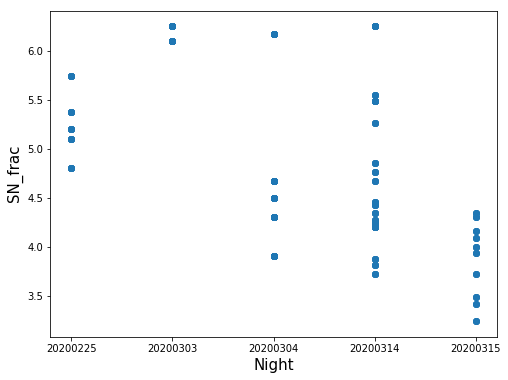

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(results["day"],results["SN_frac"])
plt.ylabel("SN_frac",fontsize=15)
plt.xlabel("Night",fontsize=15)
plt.show()

In [17]:
results[0:5]

,tile,day,petalloc,expid,SN_frac
0,66000,20200314,7,55442,4.854369
1,70510,20200304,6,53082,4.504505
2,66000,20200314,0,55442,4.201681
3,66014,20200314,8,55435,4.424779
4,66000,20200314,5,55442,3.816794


In [18]:
results.iloc[0][0]

'66000'

### Now filtering for each coadd availables and matching with the onformation on observation conditions and stored all this information in a general file.

In [19]:
tile,day,petalloc,expid,SN_frac=[],[],[],[],[]
sky_mag_AB,airmass,contrast,transparency,fwhm_asec,program,fiber_fracflux=[],[],[],[],[],[],[]
sky_mag_AB_std,airmass_std,contrast_std,transparency_std,fwhm_asec_std,fiber_fracflux_std=[],[],[],[],[],[]
for r in np.arange(0,len(results),1):
    isnight=cond_SV2["NIGHT"]==int(results.iloc[r][1])
    ispetal=cond_SV2["PETAL_LOC"]==int(results.iloc[r][2])
    isexpid=cond_SV2["EXPID"]==int(results.iloc[r][3])
    if len(cond_SV2[isnight&ispetal&isexpid])>0:
        print(int(results.iloc[r][1]),int(results.iloc[r][2]),int(results.iloc[r][3]),len(cond_SV2[isnight&ispetal&isexpid]),
             np.nanmean(cond_SV2[isnight&ispetal&isexpid]["SKY_MAG_AB"]),np.nanmin(cond_SV2[isnight&ispetal&isexpid]["SKY_MAG_AB"]),
             np.nanmax(cond_SV2[isnight&ispetal&isexpid]["SKY_MAG_AB"]))
        tile.append(results.iloc[r][0])
        day.append(results.iloc[r][1])
        petalloc.append(results.iloc[r][2])
        expid.append(results.iloc[r][3])
        SN_frac.append(results.iloc[r][4])
        sky_mag_AB.append(np.nanmean(cond_SV2[isnight&ispetal&isexpid]["SKY_MAG_AB"]))
        airmass.append(np.nanmean(cond_SV2[isnight&ispetal&isexpid]["AIRMASS"]))
        contrast.append(np.nanmean(cond_SV2[isnight&ispetal&isexpid]["CONTRAST"]))
        transparency.append(np.nanmean(cond_SV2[isnight&ispetal&isexpid]["TRANSPARENCY"]))
        fwhm_asec.append(np.nanmean(cond_SV2[isnight&ispetal&isexpid]["FWHM_ASEC"]))
        fiber_fracflux.append(np.nanmean(cond_SV2[isnight&ispetal&isexpid]["FIBER_FRACFLUX"]))
        program.append((cond_SV2[isnight&ispetal&isexpid]["PROGRAM"][0]).split(" ")[0])
        sky_mag_AB_std.append(np.nanstd(cond_SV2[isnight&ispetal&isexpid]["SKY_MAG_AB"]))
        airmass_std.append(np.nanstd(cond_SV2[isnight&ispetal&isexpid]["AIRMASS"]))
        contrast_std.append(np.nanstd(cond_SV2[isnight&ispetal&isexpid]["CONTRAST"]))
        transparency_std.append(np.nanstd(cond_SV2[isnight&ispetal&isexpid]["TRANSPARENCY"]))
        fwhm_asec_std.append(np.nanstd(cond_SV2[isnight&ispetal&isexpid]["FWHM_ASEC"]))
        fiber_fracflux_std.append(np.nanstd(cond_SV2[isnight&ispetal&isexpid]["FIBER_FRACFLUX"]))

tile,day,petalloc,expid,SN_frac=np.array(tile),np.array(day),np.array(petalloc),np.array(expid),np.array(SN_frac)
sky_mag_AB,airmass,contrast,transparency,fwhm_asec=np.array(sky_mag_AB),np.array(airmass),np.array(contrast),np.array(transparency),np.array(fwhm_asec)
sky_mag_AB_std,airmass_std,contrast_std=np.array(sky_mag_AB_std),np.array(airmass_std),np.array(contrast_std)
transparency_std,fwhm_asec_std=np.array(transparency_std),np.array(fwhm_asec_std)
program=np.array(program)
fiber_fracflux,fiber_fracflux_std=np.array(fiber_fracflux),np.array(fiber_fracflux_std)
results_all=pd.DataFrame({'program':program, 'tile':tile, 'day':day, 'petalloc':petalloc, 'expid':expid, 'SN_frac':SN_frac, 'sky_mag_AB':sky_mag_AB, 'airmass':airmass,
                      'contrast':contrast, 'transparency':transparency, 'fwhm_asec':fwhm_asec, 'fiber_fracflux':fiber_fracflux, 'sky_mag_AB_std':sky_mag_AB_std, 
                          'airmass_std':airmass_std, 'contrast_std':contrast_std, 'transparency_std':transparency_std, 'fwhm_asec_std':fwhm_asec_std, 
                         'fiber_fracflux_std':fiber_fracflux_std})

20200304 3 53086 67 20.148015558173075 20.05817530917834 20.235817956515454
20200225 7 52112 107 21.492212586420813 21.288205960237864 21.681045567858227
20200304 3 53083 67 20.017715900426225 19.935547219970466 20.07599713159297
20200304 0 53086 67 20.060550661405976 19.97815153637632 20.158726385342995
20200303 7 52942 130 19.62166445829995 19.584443666848397 19.660338573119354
20200304 7 53082 67 20.144537650791843 20.074667041158545 20.210195010474457
20200304 7 53081 67 20.099796204971923 20.02686301669012 20.16342903807764
20200304 0 53089 67 20.1638714596996 20.041270931070706 20.2475541783638
20200304 3 53081 67 20.000125476379097 19.857758186718748 20.088696097060307
20200303 3 52942 130 19.431011074077954 19.385751323549606 19.467001831417814
20200304 7 53080 67 20.03475257267997 19.94692797277068 20.09628510414147
20200303 7 52938 128 19.652869596768 19.60277943181013 19.687220987595076
20200304 3 53087 67 20.18239261798021 20.075302955485093 20.252697136650504
20200304 3 53

In [20]:
results_all

,program,tile,day,petalloc,expid,SN_frac,sky_mag_AB,airmass,contrast,transparency,fwhm_asec,fiber_fracflux,sky_mag_AB_std,airmass_std,contrast_std,transparency_std,fwhm_asec_std,fiber_fracflux_std
0,MW,70510,20200304,3,53086,4.672897,20.148016,1.101940,4.778372,0.983541,0.963023,0.599304,0.041809,0.000000e+00,0.366971,0.152443,0.110252,0.119810
1,SV,70502,20200225,7,52112,5.376344,21.492213,1.376164,2.274886,5.349047,2.946302,0.096774,0.090498,6.661338e-16,0.700801,26.050800,0.676361,0.029085
2,MW,70510,20200304,3,53083,4.672897,20.017716,1.203612,4.210454,0.942340,0.986377,0.510226,0.037982,2.220446e-16,0.407109,0.139301,0.144246,0.094184
3,MW,70510,20200304,0,53086,6.172840,20.060551,1.101940,5.559275,1.263280,1.001283,0.412456,0.044258,0.000000e+00,0.554006,0.055657,0.112403,0.053003
4,MW+BGS,70500,20200303,7,52942,6.097561,19.621664,1.457899,10.103343,0.935975,1.326782,0.456350,0.016173,2.220446e-16,1.423998,0.015533,0.131471,0.061392
5,MW,70510,20200304,7,53082,3.906250,20.144538,1.247667,3.539517,0.993996,0.975191,0.502730,0.034230,2.220446e-16,0.539955,0.050667,0.123205,0.038701
6,MW,70510,20200304,7,53081,3.906250,20.099796,1.298488,3.224084,0.994867,1.025718,0.462707,0.035634,2.220446e-16,0.516858,0.061137,0.112782,0.046481
7,MW,70510,20200304,0,53089,6.172840,20.163871,1.040688,5.211464,1.267940,1.383603,0.284508,0.055702,2.220446e-16,0.565430,0.065459,0.217413,0.046202
8,MW,70510,20200304,3,53081,4.672897,20.000125,1.298488,4.578156,0.931742,0.978162,0.540749,0.045422,2.220446e-16,0.376008,0.109192,0.101792,0.075619
9,MW+BGS,70500,20200303,3,52942,6.250000,19.431011,1.457899,9.655392,0.937951,1.328350,0.454110,0.012582,2.220446e-16,1.325190,0.006934,0.141888,0.062256


In [21]:
vars=['sky_mag_AB', 'airmass', 'contrast', 'transparency', 'fwhm_asec', 'fiber_fracflux']

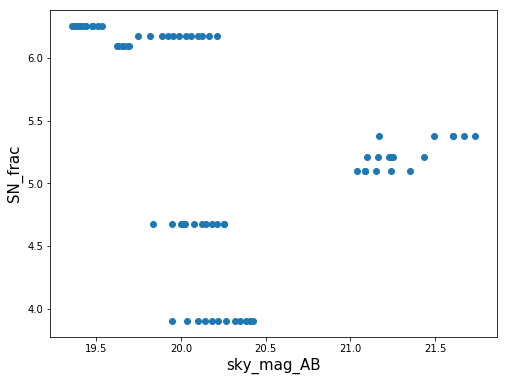

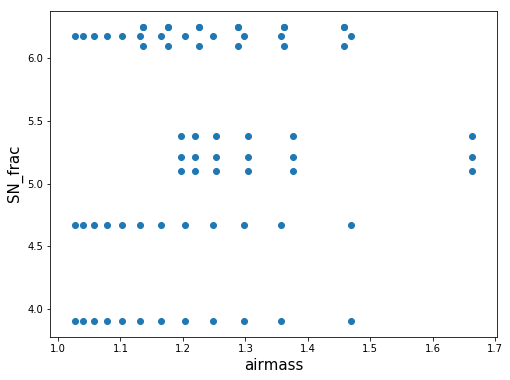

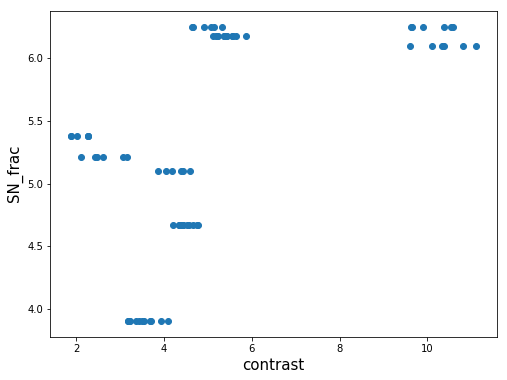

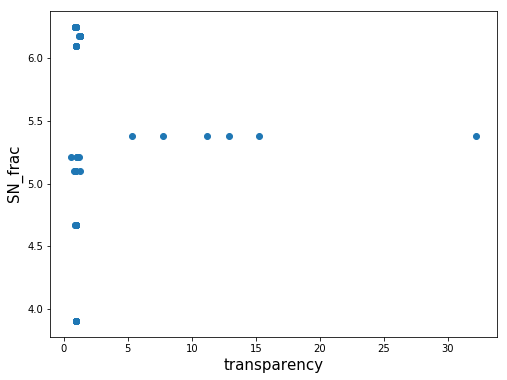

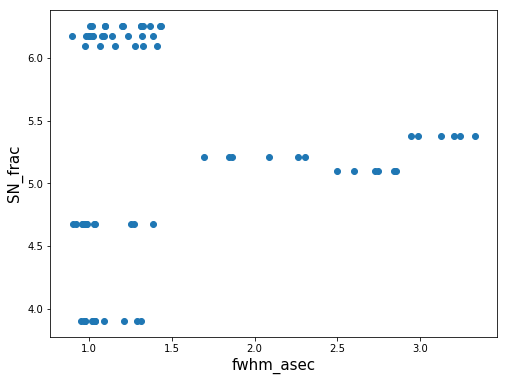

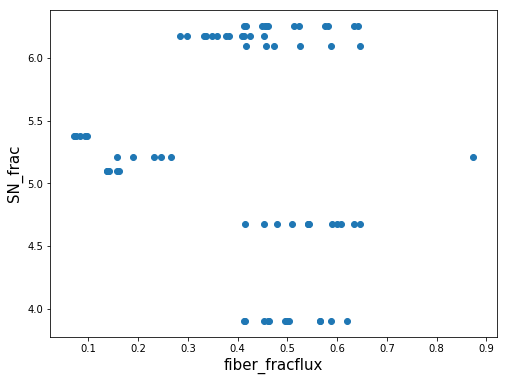

In [22]:
for i in vars:
    plt.figure(figsize=(8,6))
    plt.scatter(results_all[i],results_all["SN_frac"])
    plt.ylabel("SN_frac",fontsize=15)
    plt.xlabel(i,fontsize=15)
    plt.show()

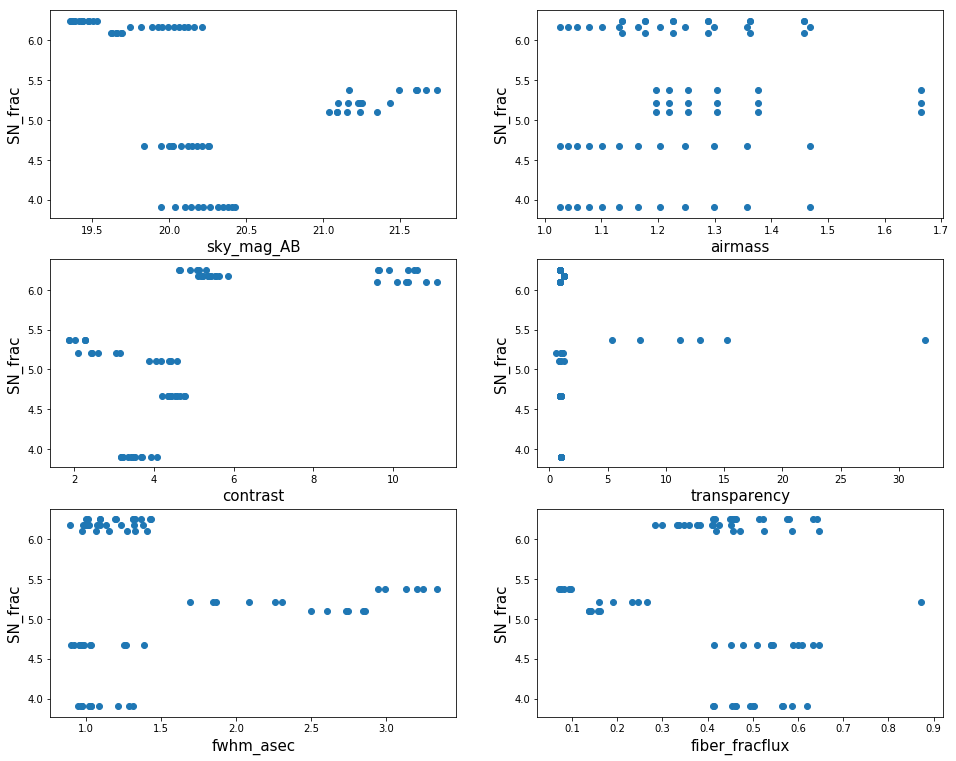

In [23]:
plt.figure(figsize=(16,13))
plt.subplot(3, 2, 1)
plt.scatter(results_all[vars[0]],results_all["SN_frac"])
plt.ylabel("SN_frac",fontsize=15)
plt.xlabel(vars[0],fontsize=15)
plt.subplot(3, 2, 2)
plt.scatter(results_all[vars[1]],results_all["SN_frac"])
plt.ylabel("SN_frac",fontsize=15)
plt.xlabel(vars[1],fontsize=15)
plt.subplot(3, 2, 3)
plt.scatter(results_all[vars[2]],results_all["SN_frac"])
plt.ylabel("SN_frac",fontsize=15)
plt.xlabel(vars[2],fontsize=15)
plt.subplot(3, 2, 4)
plt.scatter(results_all[vars[3]],results_all["SN_frac"])
plt.ylabel("SN_frac",fontsize=15)
plt.xlabel(vars[3],fontsize=15)
plt.subplot(3, 2, 5)
plt.scatter(results_all[vars[4]],results_all["SN_frac"])
plt.ylabel("SN_frac",fontsize=15)
plt.xlabel(vars[4],fontsize=15)
plt.subplot(3, 2, 6)
plt.scatter(results_all[vars[5]],results_all["SN_frac"])
plt.ylabel("SN_frac",fontsize=15)
plt.xlabel(vars[5],fontsize=15)

plt.show()